In [1]:
#Bring in modules
from bs4 import BeautifulSoup as bs
from splinter import Browser
import requests
import pymongo

In [2]:
#Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [3]:
#Define the database as mars and collection as items(for each article)
db = client.reviews
collection = db.zomato

In [4]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

#Insert url
url = 'https://www.zomato.com/new-york-city/must-visit-restaurants-in-NYC'
browser.visit(url)


In [5]:
# Retrieve page with the requests module
html = browser.html

In [6]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = bs(html, 'html.parser')

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns#" xmlns="http://www.w3.org/1999/xhtml">
 <iframe height="0" src="//8391443.fls.doubleclick.net/activityi;src=8391443;type=sales;cat=lyrkupjb;ord=1164322857034;gtm=2wg430;auiddc=1114221950.1555530238;~oref=https%3A%2F%2Fwww.zomato.com%2Fnew-york-city%2Fmust-visit-restaurants-in-NYC?" style="display: none; visibility: hidden;" width="0">
 </iframe>
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script src="https://js-agent.newrelic.com/nr-1118.min.js">
  </script>
  <script async="" src="//bat.bing.com/bat.js">
  </script>
  <script async="" src="https://connect.facebook.net/signals/config/1466145233705476?v=2.8.47&amp;r=stable">
  </script>
  <script async="" src="https://connect.facebook.net/en_US/fbevents.js">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-MKPZQ6">
  </script>
  <script type="text/jav
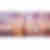

In [7]:
# Examine the results, then determine element that contains sought info
print(soup.prettify())

In [8]:
# Retrieve the parent divs for all the reviews
results = soup.find_all(class_='col-s-8 col-l-1by3')
print(results)

[<div class="col-s-8 col-l-1by3"><div class="h100 pb20"><div class="relative top-res-box entity-ads-snippet-track" data-banner-id="0" data-campaign-id="0" data-entity-id="16778990" data-entity-type="restaurant" data-rating="4.2" data-res-id="16778990" data-res-position="1" data-slot-id="0" data-source="desktop" style="height: 100%;">
<a class="relative lazy top-res-box-bg pl10 ptop0" data-link-type="restaurant" data-original="https://b.zmtcdn.com/data/pictures/0/16778990/d3e30e21708f2b61506fa6874b1018eb_top_thumb_620_314.jpg?output-format=webp" href="https://www.zomato.com/new-york-city/sylvias-restaurant-harlem?zrp_bid=0&amp;zrp_pid=14" style="background-size:cover; background-image: url(https://b.zmtcdn.com/images/photo-backs/restaurant-back.jpg?output-format=webp);  height:150px;  display: block; border-radius: 4px; background-position:center;">
<div class="ads-res-snippet-rating-large rating-for-16778990 level-7" data-res-id="16778990">
              4.2
            </div>
</a>
<di

In [9]:
# Retrieve the data

for result in results:
  
        #Identify and save the link to the restaurant's details
        details_link = result.find(class_="relative lazy top-res-box-bg pl10 ptop0")
        web_addr = details_link['href']
        
        #Identify and save the restaurant's star rating
        pre_rating = result.find(class_="relative top-res-box entity-ads-snippet-track")
        rating = pre_rating['data-rating']
        
        #Identify and save the restaurant name
        pre_name = result.find(class_='res_title zblack bold nowrap')
        name = pre_name['title']
        
        #Print the data
        print(name)
        print(rating)
        print(web_addr)
        print('-------')
        

Sylvia's Restaurant
4.2
https://www.zomato.com/new-york-city/sylvias-restaurant-harlem?zrp_bid=0&zrp_pid=14
-------
Bamonte's
4.0
https://www.zomato.com/new-york-city/bamontes-adelphi?zrp_bid=0&zrp_pid=14
-------
Le Bernardin
4.7
https://www.zomato.com/new-york-city/le-bernardin-gramercy?zrp_bid=0&zrp_pid=14
-------
Peter Luger Steak House
4.7
https://www.zomato.com/new-york-city/peter-luger-steak-house-south-side?zrp_bid=0&zrp_pid=14
-------
The Halal Guys
4.9
https://www.zomato.com/the-halal-guys-food-truck?zrp_bid=0&zrp_pid=14
-------
Shake Shack
4.9
https://www.zomato.com/new-york-city/shake-shack-upper-west-side?zrp_bid=0&zrp_pid=14
-------
Los Tacos No. 1
4.4
https://www.zomato.com/new-york-city/los-tacos-no-1-chelsea?zrp_bid=0&zrp_pid=14
-------
Katz's Delicatessen
4.9
https://www.zomato.com/new-york-city/katzs-delicatessen-lower-east-side?zrp_bid=0&zrp_pid=14
-------
Gray's Papaya
4.5
https://www.zomato.com/new-york-city/grays-papaya-upper-west-side?zrp_bid=0&zrp_pid=14
-------

In [10]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

#Insert url
url = web_addr
browser.visit(url)

# Retrieve page with the requests module
html = browser.html

# Create BeautifulSoup object; parse with 'html.parser'
soup = bs(html, 'html.parser')

In [12]:
# Retrieve the parent divs for all the reviews
results = soup.find_all(class_='row')
print(results)



[<div class="mini-header row">
<div class="wrapper">
<div class="row mini-header__breadcrumb">
<div class="col-l-10 col-m-10">
<ol itemscope="" itemtype="http://schema.org/BreadcrumbList"><li class="ui mini breadcrumb" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem">
<span>
<a class="tduh section home" href="https://www.zomato.com" itemprop="item">
<span class="grey-text" itemprop="name">Home
                                </span>
</a>
</span>
<meta content="1" itemprop="position"/>
</li><li class="ui mini breadcrumb" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem">
<div class="left"> <i class="right angle tiny icon"></i>
</div>
<span>
<a href="https://www.zomato.com/united-states" itemprop="item">
<span class="tduh grey-text" itemprop="name">United States</span>
</a>
</span>
<meta content="2" itemprop="position"/>
</li><li class="ui mini breadcrumb" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem

In [20]:
#Get reviews, category, telephone, address
reviews = soup.find(class_='mt2 mb0 rating-votes-div rrw-votes grey-text fontsize5 ta-right').text
#reviews = soup.find('aria-label')
print(reviews)
category = soup.find(class_="res-info-cuisines clearfix").text
print(category)
telephone = soup.find(class_= "fontsize2 bold zgreen").text
print(telephone)
address = soup.find(class_="resinfo-icon").text
print(address)


 95  votes

Chinese, Burger
(212) 786-2068

81 Saint Marks Place,  NY  10003 
